In [1]:
import itertools
import math
import os
import re
import warnings

from IPython.display import display, HTML

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import natsort

import numpy as np
import pandas as pd
from plotnine import *
import seaborn

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import yaml

In [2]:
warnings.simplefilter('ignore')

In [3]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

In [4]:
theme_set(theme_seaborn(style='white', context='talk', font_scale=1))
plt.style.use('seaborn-white')

In [5]:
resultsdir=config['resultsdir']
os.makedirs(resultsdir, exist_ok=True)

In [6]:
#read data
lenti_DMS = pd.read_csv(config['lenti_dms_REGN10933'])
yeast_DMS_Star = pd.read_csv(config['yeast_dms_REGN10933_Star'])

In [7]:
a = ['214a' , '214b', '214c']
lenti_DMS = lenti_DMS[~lenti_DMS['site'].isin(a)]

lenti_DMS['site']=lenti_DMS['site'].astype(int)
lenti_DMS

,epitope,site,wildtype,mutant,mutation,escape_mean,escape_median,escape_std,n_models,times_seen,frac_models
0,1,1,M,F,M1F,0.1881,0.1881,0.0822,2,2.50,0.50
1,1,1,M,I,M1I,-0.0159,-0.0159,0.0653,2,3.00,0.50
2,1,1,M,K,M1K,1.6372,1.4280,0.9661,3,1.00,0.75
3,1,1,M,L,M1L,0.0128,0.0167,0.0803,4,1.50,1.00
4,1,1,M,N,M1N,0.1310,0.0393,0.2769,3,1.00,0.75
...,...,...,...,...,...,...,...,...,...,...,...
8222,1,1253,*,G,*1253G,0.0076,0.0076,0.1399,2,1.00,0.50
8223,1,1253,*,L,*1253L,-0.2359,-0.2359,0.1647,2,5.00,0.50
8224,1,1253,*,R,*1253R,0.0062,0.0033,0.0827,4,17.75,1.00
8225,1,1253,*,W,*1253W,-0.1891,-0.1784,0.2414,4,1.00,1.00


In [8]:
yeast_DMS_Star

,condition,site,wildtype,mutation,mut_escape,site_total_escape,site_max_escape
0,REGN10933,331,N,A,0.003320,0.02906,0.00380
1,REGN10933,331,N,D,0.002249,0.02906,0.00380
2,REGN10933,331,N,E,0.001125,0.02906,0.00380
3,REGN10933,331,N,F,0.001125,0.02906,0.00380
4,REGN10933,331,N,G,0.001125,0.02906,0.00380
...,...,...,...,...,...,...,...
7787,REGN10933,531,T,R,NaN,0.06410,0.01125
7788,REGN10933,531,T,S,NaN,0.06410,0.01125
7789,REGN10933,531,T,V,NaN,0.06410,0.01125
7790,REGN10933,531,T,W,NaN,0.06410,0.01125


## Compare to Star dataset

In [9]:
merged_DMS = pd.merge(yeast_DMS_Star, lenti_DMS,  how='inner',
                      left_on=['site', 'mutation'],
                      right_on = ['site', 'mutant'])
merged_DMS

,condition,site,wildtype_x,mutation_x,mut_escape,site_total_escape,site_max_escape,epitope,wildtype_y,mutant,mutation_y,escape_mean,escape_median,escape_std,n_models,times_seen,frac_models
0,REGN10933,331,N,D,0.002249,0.02906,0.00380,1,N,D,N331D,0.2651,0.2202,0.1995,4,5.00,1.0
1,REGN10933,331,N,D,NaN,0.02906,0.00380,1,N,D,N331D,0.2651,0.2202,0.1995,4,5.00,1.0
2,REGN10933,331,N,D,NaN,0.02906,0.00380,1,N,D,N331D,0.2651,0.2202,0.1995,4,5.00,1.0
3,REGN10933,331,N,D,NaN,0.02906,0.00380,1,N,D,N331D,0.2651,0.2202,0.1995,4,5.00,1.0
4,REGN10933,331,N,K,0.001125,0.02906,0.00380,1,N,K,N331K,-0.0255,-0.0313,0.0417,4,1.25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,REGN10933,531,T,N,NaN,0.06410,0.01125,1,T,N,T531N,-0.3022,-0.2341,0.4065,4,2.25,1.0
3120,REGN10933,531,T,S,0.011250,0.06410,0.01125,1,T,S,T531S,-0.1862,-0.0157,0.3807,4,1.75,1.0
3121,REGN10933,531,T,S,NaN,0.06410,0.01125,1,T,S,T531S,-0.1862,-0.0157,0.3807,4,1.75,1.0
3122,REGN10933,531,T,S,NaN,0.06410,0.01125,1,T,S,T531S,-0.1862,-0.0157,0.3807,4,1.75,1.0


In [10]:
merged_DMS = merged_DMS[['site', 'mutation_y', 'mut_escape' , 'escape_mean', 'escape_median', 'n_models', 'times_seen', 'frac_models','wildtype_y', 'mutation_x']]

merged_DMS

,site,mutation_y,mut_escape,escape_mean,escape_median,n_models,times_seen,frac_models,wildtype_y,mutation_x
0,331,N331D,0.002249,0.2651,0.2202,4,5.00,1.0,N,D
1,331,N331D,NaN,0.2651,0.2202,4,5.00,1.0,N,D
2,331,N331D,NaN,0.2651,0.2202,4,5.00,1.0,N,D
3,331,N331D,NaN,0.2651,0.2202,4,5.00,1.0,N,D
4,331,N331K,0.001125,-0.0255,-0.0313,4,1.25,1.0,N,K
...,...,...,...,...,...,...,...,...,...,...
3119,531,T531N,NaN,-0.3022,-0.2341,4,2.25,1.0,T,N
3120,531,T531S,0.011250,-0.1862,-0.0157,4,1.75,1.0,T,S
3121,531,T531S,NaN,-0.1862,-0.0157,4,1.75,1.0,T,S
3122,531,T531S,NaN,-0.1862,-0.0157,4,1.75,1.0,T,S


In [11]:
merged_DMS = merged_DMS[merged_DMS['mut_escape'].notna()]
merged_DMS   
# merged_DMS.to_csv('merged.csv', sep='\t')

,site,mutation_y,mut_escape,escape_mean,escape_median,n_models,times_seen,frac_models,wildtype_y,mutation_x
0,331,N331D,0.002249,0.2651,0.2202,4,5.00,1.00,N,D
4,331,N331K,0.001125,-0.0255,-0.0313,4,1.25,1.00,N,K
8,331,N331S,0.001125,0.0492,0.0204,4,7.50,1.00,N,S
12,331,N331T,0.001857,0.0444,-0.0843,4,1.50,1.00,N,T
16,332,I332S,0.001130,-0.1613,-0.1613,2,1.00,0.50,I,S
...,...,...,...,...,...,...,...,...,...,...
3104,530,S530R,0.001125,-0.0048,-0.0048,2,1.50,0.50,S,R
3108,530,S530T,0.006129,0.0573,-0.0533,4,3.25,1.00,S,T
3112,531,T531I,0.004738,-0.6515,-0.6515,1,1.00,0.25,T,I
3116,531,T531N,0.003722,-0.3022,-0.2341,4,2.25,1.00,T,N


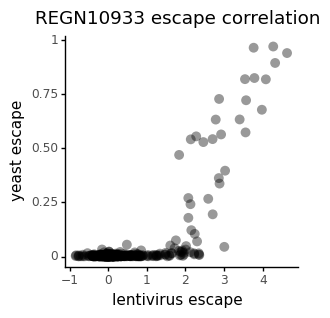

In [12]:
escape_corr=(
    ggplot(merged_DMS.loc[(merged_DMS['frac_models'] >=0.25)&( merged_DMS['times_seen'] >=3)&(merged_DMS['n_models'] >=3)]) +
    aes(x="escape_median", y="mut_escape") +
    geom_point(size=4, alpha=0.4, stroke = 0) + 
    theme_classic() +
    theme(figure_size=(3,3)) +
    labs(
        title = "REGN10933 escape correlation",
        x="lentivirus escape",
        y="yeast escape")
)

_ = escape_corr.draw()

_.savefig(f'{resultsdir}/REGN10933_escape_corr_Star.pdf', bbox_inches='tight')
